<img src=".\img\mioti.png">   


# Proyecto Reconocimiento Facial: Almacenamiento de Caras

<img src="./img/emociones.png" style="width: 800px">

### Objetivos

En este notebook vamos a ir almacenando fotografías de las personas a las que queremos registrar para identificar más adelante.
Los pasos que se llevarán a cabo serán:
    
* Comprobar si esa persona está ya registrada en el sistema, en caso que no sea así se creará una carpeta con su nombre en el directorio de 'reconocimiento'
* A través de la video-cámara del equipo se irán tomando fotografías de la persona siempre que esta sea reconocida por el recuadro
* Estas fotografías se irán guardando en su carpeta correspondiente para el entrenamiento posterior de la red neuronal

### Importación de librerías

* Las librerías que vamos a utilizar son:
    * cv2: para trabajar con imágenes y vídeos
    * os: para trabajar con directorios
    * numpy: para trabajar con arrays
    * matplotlib: para visualizar las fotos tomadas

In [1]:
#Se importan las librerías necesarias
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array

### Almacenado

* En primer lugar vamos a definir una ruta donde guardar las fotografías que se vayan generando. Estas se irán almacenando dentro de una carpeta con el nombre de la persona a la que se quiere registrar, en caso que esa carpeta no exista se creará

In [2]:
#Se define la ruta donde se va a crear la carpeta donde se alamcenarán los rostros del individuo
person_name='Ricardo' #Pon aqui tu nombre
data_path='./reconocimiento'
person_path=data_path+'/'+person_name
print(person_path)

./reconocimiento/Ricardo


In [3]:
#Creamos carpeta con nombre de la persona
if not os.path.exists(person_path):
    print('carpeta creada: ',person_path)
    os.makedirs(person_path)

* Para la captura de caras de las personas vamos a conectar la cámara del equipo y mantenerla activa mediante un bucle infinito, dentro de este bucle se van a invocar las siguientes funciones:

    * face_detector: genera el cuadro cuando se reconoce un rostro, el tamaño será de 150x150
    * draw_text_with_background: da formato al recuadro
    
* Mientras dure el bucle cada vez que sea identificado un rostro, este será capturado y añadido a la carpeta del nombre de la persona correspondiente. El ciclo termina en el momento en que se pulsa 'enter' o se llega a un número determinado de capturas, en nuestro caso hemos determinado 500 fotos como suficientes para que el modelo pueda hacer bien el reconocimiento

In [4]:
def draw_text_with_backgroud(img, text, x, y, font_scale, thickness=1, font=cv2.FONT_HERSHEY_SIMPLEX,
                            background=(175,50,200), foreground=(255,255,255), box_coords_1=(-5,5), box_coords_2=(5,-5)):
    (text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
    box_coords = ((x+box_coords_1[0], y+box_coords_1[1]), (x + text_width + box_coords_2[0], y - text_height + box_coords_2[1]))
    cv2.rectangle(img, box_coords[0], box_coords[1], background, cv2.FILLED)
    cv2.putText(img, text, (x, y), font, fontScale=font_scale, color=foreground, thickness=thickness)

In [5]:
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

def face_detector(img):
    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.5, 3)
    if len(faces) == 0:
        return (0,0,0,0), np.zeros((150,150), np.uint8), img
    
    for idx,face in enumerate(faces):
        x,y,w,h = face
    
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (150, 150), interpolation = cv2.INTER_CUBIC)
        
        if np.sum([roi_gray]) != 0.0:
            roi = roi_gray.astype("float") / 255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi, axis=0)

        # make a prediction on the ROI, then lookup the class

            label = f'Persona {idx} EMOCION'#class_labels[preds.argmax()]  
            draw_text_with_backgroud(img, label, x + 5, y, font_scale=0.4)

        else:
            cv2.putText(img, "No Face Found", (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,2, (0,255,0), 3)
            draw_text_with_backgroud(img, "No Face Found", x + 5, y, font_scale=0.4)

    
            
    return (x,w,y,h), roi_gray, img

cap = cv2.VideoCapture(0)
count=0
while True:

    ret, frame = cap.read()
    rect, face, image = face_detector(frame)
    if (face.sum()!=0):#Hay captura de cara
        cv2.imwrite(person_path+'/rostro_{}.jpg'.format(count),face)
        count+=1
       
    cv2.imshow('Reconocedor de Emociones', image)
    if cv2.waitKey(1) == 13 or count>=500: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows() 

### Visualización

* Una vez guardadas las fotografías de las personas que se quieren registrar vamos a pasar a realizar una visualización de una fracción de estas para comprobar que el proceso se está realizando correctamente. Para ello recorreremos todas las carpetas del directorio 'reconocimiento' y tomaremos las 5 primeras imágenes de cada una de ellas para después representarlas

In [6]:
lista_gente=os.listdir(data_path)
print(lista_gente)

['Javier', 'Juan Pedro', 'Ricardo']


In [7]:
photo=[]
names=[]

for name in lista_gente:
    #Directorio de cada alumno
    name_path='./reconocimiento/'+name
    #Lista con los nombres de cada foto
    photo_name=os.listdir(name_path)
    #Bucle con las 5 primeras fotos de cada alumno
    for image in photo_name[:5]:
        #Ruta de cada foto
        img=name_path+'/'+image
        #Se añade foto a lista
        photo.append(cv2.imread(img))
        #Se añade nombre a lista
        names.append(name)

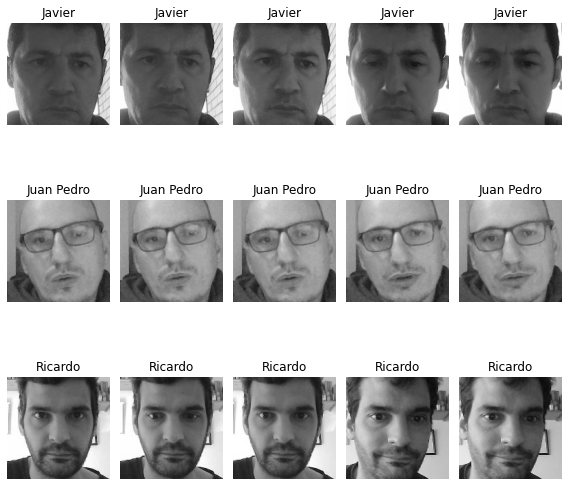

In [8]:
row=len(lista_gente)
col=5
axes=[]
fig=plt.figure(figsize=(8,8))
#Recorremos la figura añadiendo en cada recuadro una imagen con su etiqueta
for i in range(row*col):
    img=photo[i]
    label=names[i]
    axes.append(fig.add_subplot(row,col,i+1))
    axes[-1].set_title(label)
    plt.imshow(img)
    plt.axis("off")
fig.tight_layout()    
plt.show()

* Las caras se corresponden con el nombre de las carpetas donde fueron guardadas, el proceso se ha realizado correctamente